In [1]:
#fifthnote

In [2]:
!git clone https://github.com/Segunstar/ml-course-materials.git

Cloning into 'ml-course-materials'...
remote: Enumerating objects: 3119, done.
remote: Total 3119 (delta 0), reused 0 (delta 0), pack-reused 3119 (from 1)
Receiving objects: 100% (3119/3119), 52.52 MiB | 27.65 MiB/s, done.
Resolving deltas: 100% (501/501), done.


In [3]:
import os
import pandas as pd
rating_path = os.getcwd() +'/ml-course-materials/ml-100k/u.data'
movie_path = os.getcwd() +'/ml-course-materials/ml-100k/u.item'

In [4]:
r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv(rating_path, sep='\t', names=r_cols, usecols=range(3))
ratings.head()

,user_id,movie_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [9]:
import numpy as np
movieProperties = ratings.groupby('movie_id')['rating'].agg(['size', 'mean'])

movieProperties.head()

,size,mean
movie_id,,
1,452,3.878319
2,131,3.206107
3,90,3.033333
4,209,3.550239
5,86,3.302326


In [10]:
movieNumRatings = pd.DataFrame(movieProperties['size'])
movieNormalizedNumRatings = movieNumRatings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
movieNormalizedNumRatings.head()

,size
movie_id,
1,0.773585
2,0.222985
3,0.152659
4,0.356775
5,0.145798


In [16]:
movieDict = {}
with open(movie_path, encoding="ISO-8859-1") as f:
    temp = ''
    for line in f:
        #line.decode("ISO-8859-1")
        fields = line.rstrip('\n').split('|')
        movieID = int(fields[0])
        name = fields[1]
        genres = fields[5:25]
        genres = map(int, genres)
        movieDict[movieID] = (name, np.array(list(genres)), movieNormalizedNumRatings.loc[movieID].get('size'), movieProperties.loc[movieID, 'mean'])

In [17]:
movieDict[1]

('Toy Story (1995)',
 array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 0.7735849056603774,
 3.8783185840707963)

In [18]:
#PRINCIPAL COMPONENT ANALYSIS

In [19]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

In [20]:
iris = load_iris()

In [21]:
numSamples, numFeatures = iris.data.shape
print(numSamples)
print(numFeatures)
print(list(iris.target_names))

150
4
['setosa', 'versicolor', 'virginica']


In [24]:
X = iris.data
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

In [25]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [27]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461872 0.05306648]
0.9776852063187977


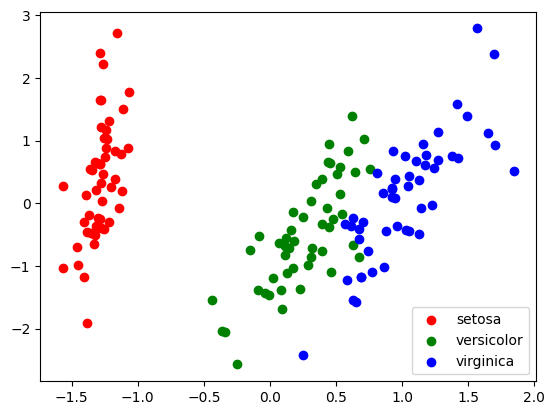

In [28]:
colors = cycle('rgb')
target_ids = range(len(iris.target_names))
pl.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1],
               c=c, label=label)
pl.legend()
pl.show()